<div style="text-align: center;
            position: relative;
            overflow: hidden;
            border-radius: 8px;
            border: 3px solid black;
            background-image: url('https://justglobetrotting.com/wp-content/uploads/2016/02/Blog-18-Debit-fraud.png');
            background-size: cover; /* Ajuste l'image pour couvrir tout le conteneur */
            background-position: center; /* Centre l'image horizontalement et verticalement */
            color: white;">
    <h2 style="background-color: rgba(2, 0, 36, 0.6);color:white;text-transform: uppercase;padding:50px 0px;margin:0px">Credit Card Fraud Detection using Machine Learning </h2>
</div>


# I-INTRODUCTION 

Banks use several techniques to detect fraud:

1. Real-time transaction analysis:
Transaction monitoring: Spotting unusual or suspicious activity, such as sudden foreign purchases or large amounts.
2. Pre-defined rules: 
Trigger alerts based on specific rules, such as multiple withdrawal attempts in a short period of time or transactions in remote locations.
3. Advanced authentication technologies:

* Two-factor authentication (2FA): A second form of verification in addition to the password is used, such as a code sent by SMS.
* Biometrics: Using fingerprints or facial recognition to verify identity. But it does not guarantee absolute protection against fraud, but it can help reduce risk when combined with other appropriate security measures.

![](https://as1.ftcdn.net/v2/jpg/01/62/36/20/1000_F_162362053_yfj9hSfV9ByULR1tQtEptBt0SnPoYLzN.jpg)
**However, not all banks in all countries implement all these techniques equally. In some countries, banks may use simpler methods due to resource, regulatory or technological constraints. Fraudsters often circumvent these controls by using attractive websites to obtain credit card information, then wait 2 or 3 days before acting.**

Every year, credit card fraud results in considerable losses. While fraud detection represents a significant investment for the financial system, it is crucial to maintain a balance between fraud protection and the customer experience.

In a competitive market, banks need to minimize false positives in fraud detection to avoid the unjustified rejection of legitimate customer transactions. This requires robust and accurate fraud detection systems. To this end, I will be using machine learning models to analyze and identify fraud in transactions.

# II-DATA PREPARATION

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import   ConfusionMatrixDisplay



/kaggle/input/credit-card-fraud-transaction-data/CreditCardData.csv


In [2]:
data= pd.read_csv("/kaggle/input/credit-card-fraud-transaction-data/CreditCardData.csv")

In [3]:
data

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


In [4]:
data.count()

Transaction ID            100000
Date                      100000
Day of Week               100000
Time                      100000
Type of Card              100000
Entry Mode                100000
Amount                     99994
Type of Transaction       100000
Merchant Group             99990
Country of Transaction    100000
Shipping Address           99995
Country of Residence      100000
Gender                     99996
Age                       100000
Bank                      100000
Fraud                     100000
dtype: int64

In [5]:
data.isnull().sum()

Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64

In [6]:
data.drop_duplicates()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


In [7]:
data=data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99977 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction ID          99977 non-null  object 
 1   Date                    99977 non-null  object 
 2   Day of Week             99977 non-null  object 
 3   Time                    99977 non-null  int64  
 4   Type of Card            99977 non-null  object 
 5   Entry Mode              99977 non-null  object 
 6   Amount                  99977 non-null  object 
 7   Type of Transaction     99977 non-null  object 
 8   Merchant Group          99977 non-null  object 
 9   Country of Transaction  99977 non-null  object 
 10  Shipping Address        99977 non-null  object 
 11  Country of Residence    99977 non-null  object 
 12  Gender                  99977 non-null  object 
 13  Age                     99977 non-null  float64
 14  Bank                    99977 non-null  obj

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

/tmp/ipykernel_33/1453708669.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])
/tmp/ipykernel_33/1453708669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99977 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Transaction ID          99977 non-null  object        
 1   Date                    99977 non-null  datetime64[ns]
 2   Day of Week             99977 non-null  object        
 3   Time                    99977 non-null  int64         
 4   Type of Card            99977 non-null  object        
 5   Entry Mode              99977 non-null  object        
 6   Amount                  99977 non-null  object        
 7   Type of Transaction     99977 non-null  object        
 8   Merchant Group          99977 non-null  object        
 9   Country of Transaction  99977 non-null  object        
 10  Shipping Address        99977 non-null  object        
 11  Country of Residence    99977 non-null  object        
 12  Gender                  99977 non-null  object     

In [11]:
data['Amount'] = data['Amount'].str.replace('£', '').astype(float)


/tmp/ipykernel_33/635776578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Amount'] = data['Amount'].str.replace('£', '').astype(float)


In [12]:
total_transactions = data['Fraud'].count()
total_frauds = data['Fraud'].sum()

# Calculate the number of non-fraud cases
total_non_frauds = total_transactions - total_frauds

# Calculate the number of fraud cases
fraud_percentage = (total_frauds / total_transactions) * 100

# Percentage of non-fraud calculated
non_fraud_percentage = (total_non_frauds / total_transactions) * 100

print(f'Percentage of frauds: {fraud_percentage:.2f}%')
print(f'Percentage of non-fraud: {non_fraud_percentage:.2f}%')


Percentage of frauds: 7.19%
Percentage of non-fraud: 92.81%


Problem of Unbalanced Classes: Fraud generally represents a small proportion of all transactions, which can lead to model bias.

# III-DATA VISUALIZATION 

In [13]:
data_fraud = data[data['Fraud'] == 1]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


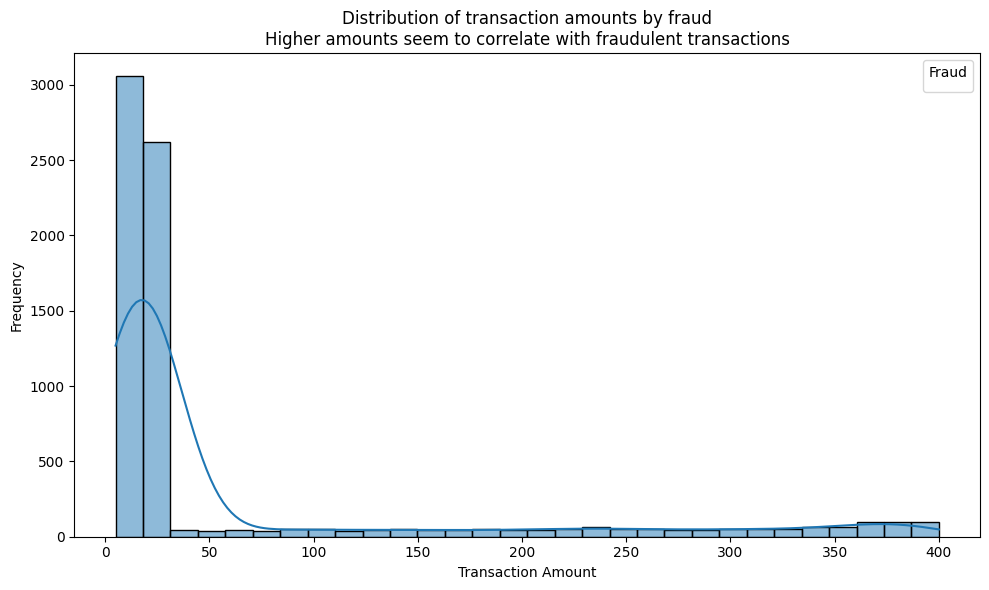

In [14]:

plt.figure(figsize=(10, 6))
sns.histplot(data=data_fraud, x='Amount', hue='Fraud', kde=True, bins=30)

plt.title('Distribution of transaction amounts by fraud\nHigher amounts seem to correlate with fraudulent transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend(title='Fraud')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


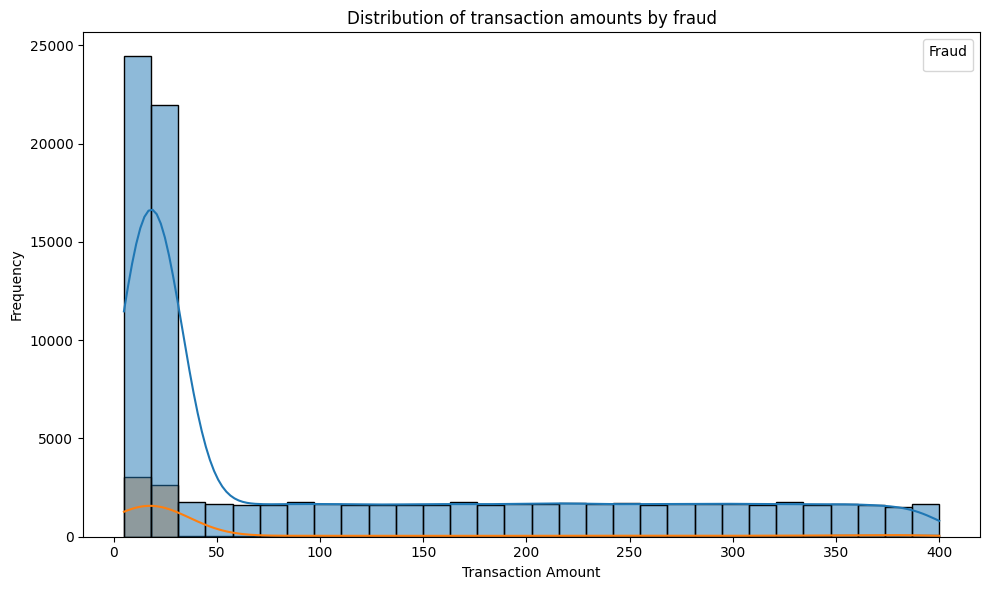

The average transaction amount for fraudulent transactions is 63.89, while for non-fraudulent transactions it is 116.35. The median transaction amount is 21.00 for fraudulent transactions and 32.00 for non-fraudulent transactions.


In [15]:

fraud_transactions = data[data['Fraud'] == 1]['Amount']
non_fraud_transactions = data[data['Fraud'] == 0]['Amount']

fraud_mean = fraud_transactions.mean()
non_fraud_mean = non_fraud_transactions.mean()
fraud_median = fraud_transactions.median()
non_fraud_median = non_fraud_transactions.median()

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Amount', hue='Fraud', kde=True, bins=30)
plt.title('Distribution of transaction amounts by fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend(title='Fraud')
plt.tight_layout()
plt.show()

description = (
    f"The average transaction amount for fraudulent transactions is {fraud_mean:.2f}, "
    f"while for non-fraudulent transactions it is {non_fraud_mean:.2f}. "
    f"The median transaction amount is {fraud_median:.2f} for fraudulent transactions "
    f"and {non_fraud_median:.2f} for non-fraudulent transactions."
)

print(description)


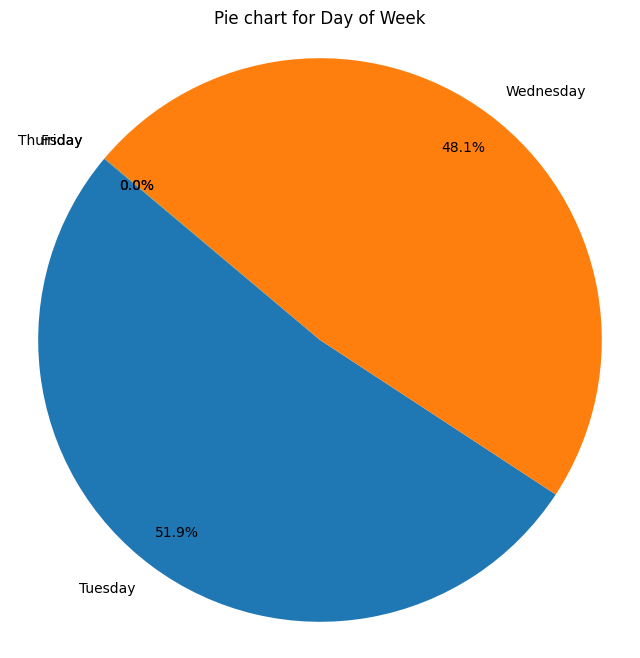

For the column 'Day of Week', the most common value is 'Tuesday' which represents 51.9% of the data.


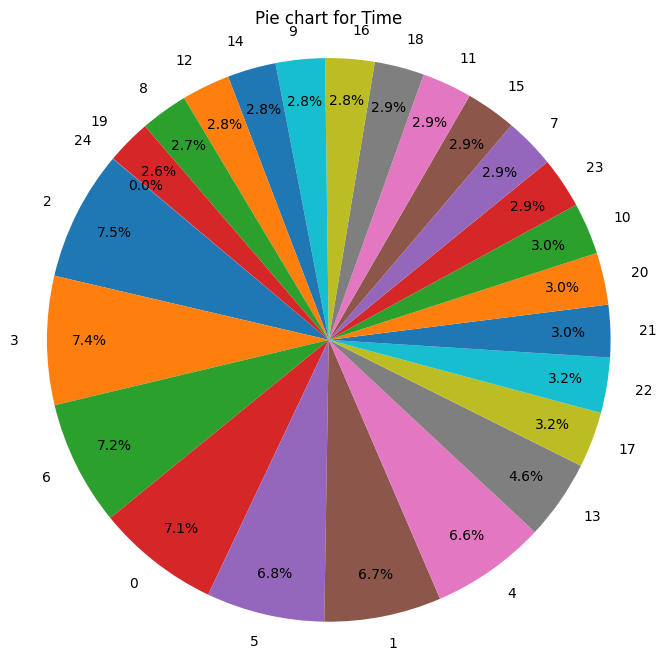

For the column 'Time', the most common value is '2' which represents 7.5% of the data.


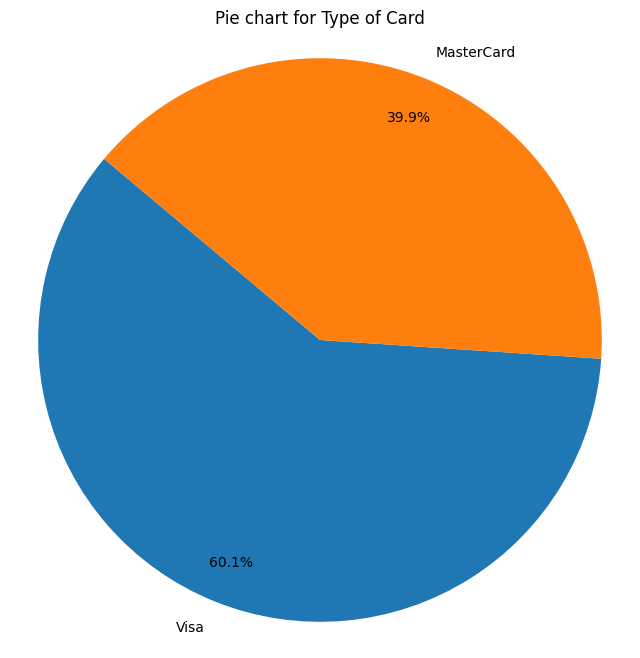

For the column 'Type of Card', the most common value is 'Visa' which represents 60.1% of the data.


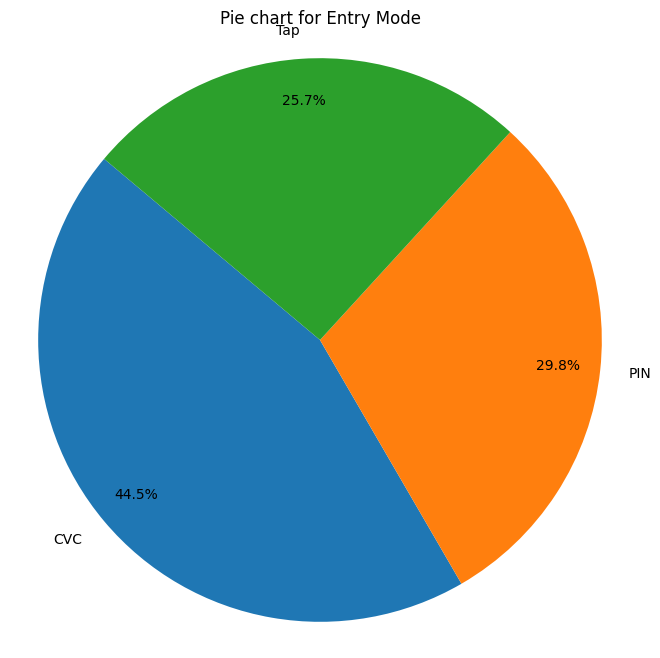

For the column 'Entry Mode', the most common value is 'CVC' which represents 44.5% of the data.


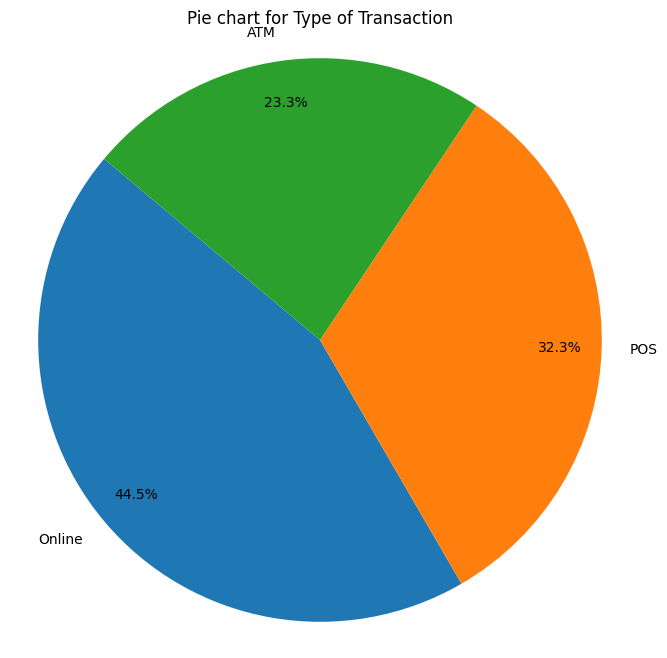

For the column 'Type of Transaction', the most common value is 'Online' which represents 44.5% of the data.


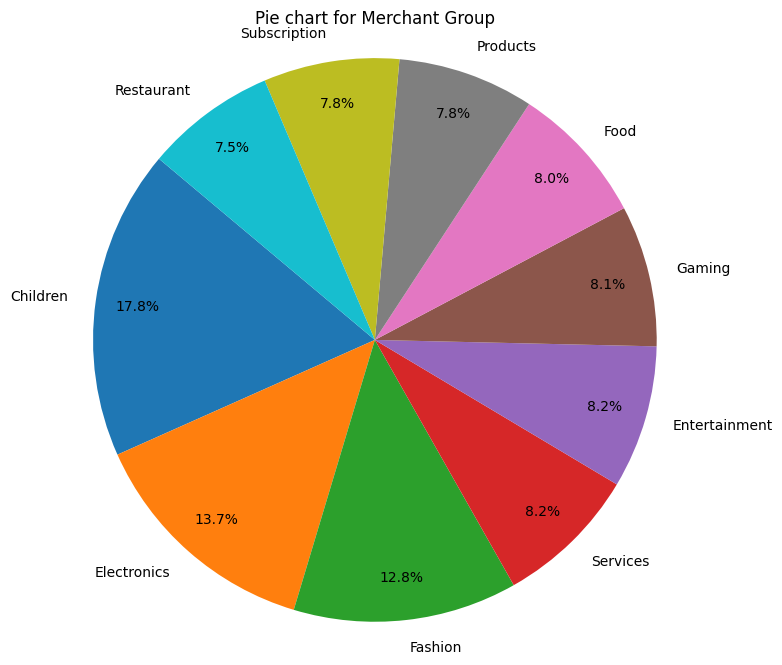

For the column 'Merchant Group', the most common value is 'Children' which represents 17.8% of the data.


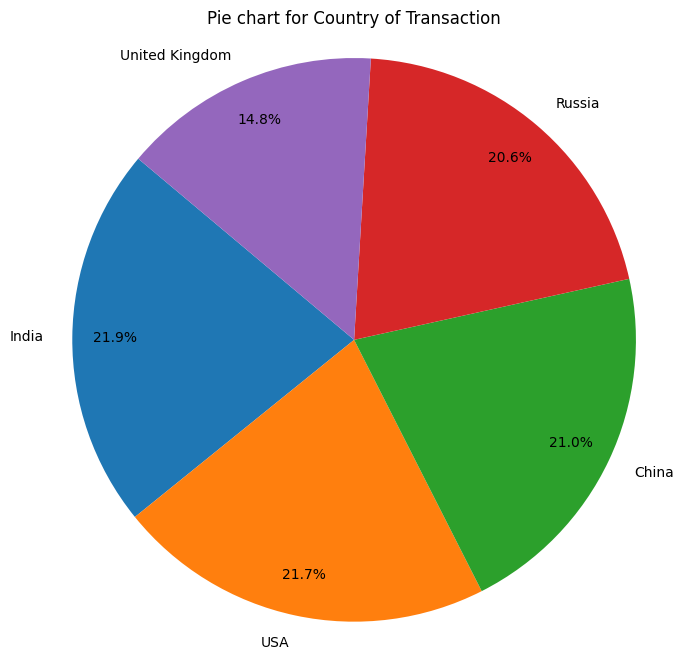

For the column 'Country of Transaction', the most common value is 'India' which represents 21.9% of the data.


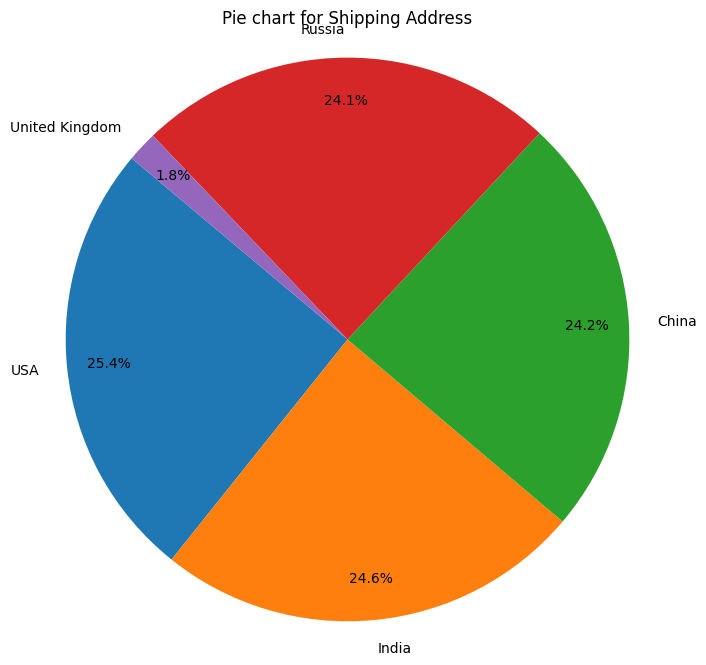

For the column 'Shipping Address', the most common value is 'USA' which represents 25.4% of the data.


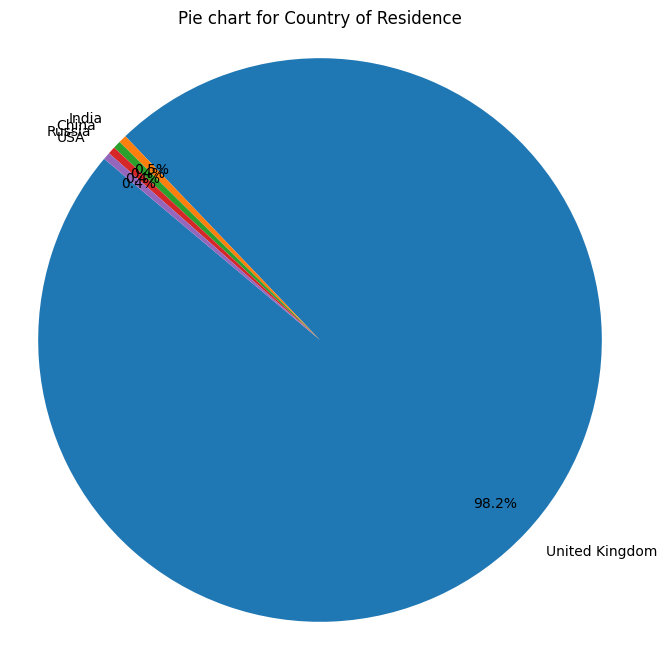

For the column 'Country of Residence', the most common value is 'United Kingdom' which represents 98.2% of the data.


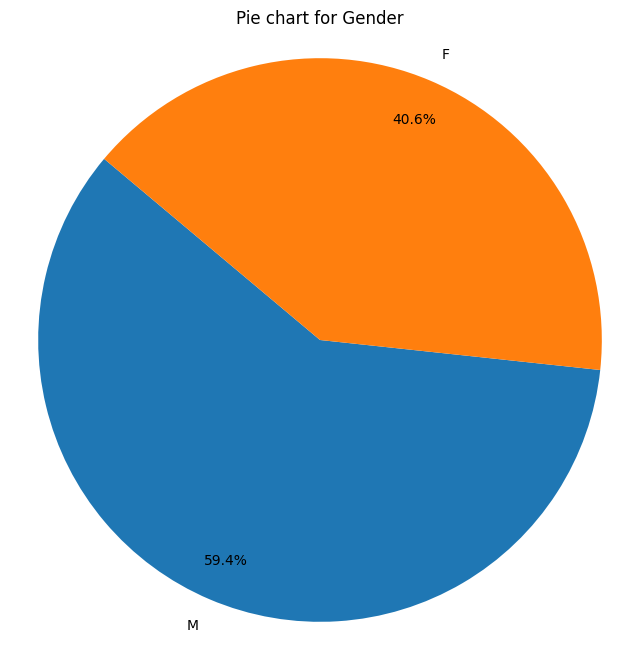

For the column 'Gender', the most common value is 'M' which represents 59.4% of the data.


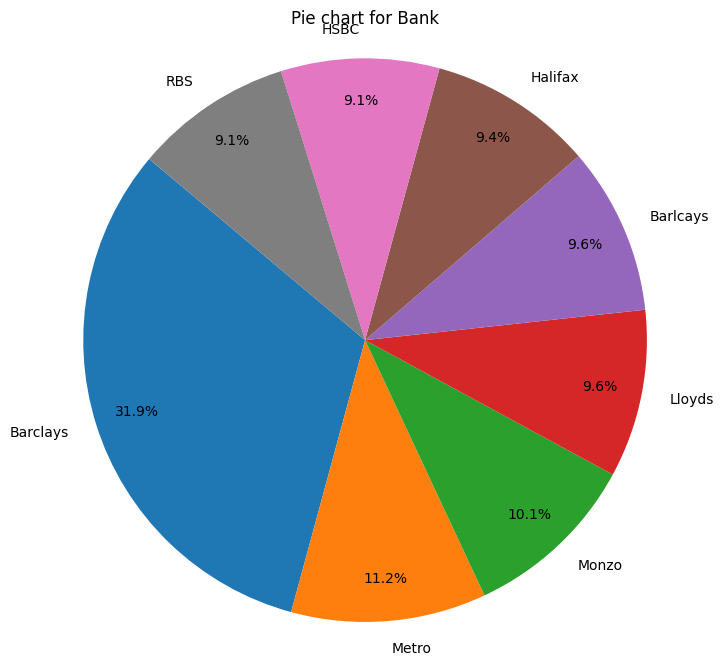

For the column 'Bank', the most common value is 'Barclays' which represents 31.9% of the data.


In [16]:
import matplotlib.pyplot as plt

column_piechart = ['Day of Week', 'Time', 'Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group', 'Country of Transaction', 'Shipping Address', 'Country of Residence', 'Gender', 'Bank']

for column in column_piechart:
    if data_fraud[column].dtype in ['object', 'int64', 'float64']: 
        value_counts = data_fraud[column].value_counts()
        
        # Create a pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
        plt.title(f'Pie chart for {column}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
        
        # Generate an interpretative sentence
        most_common_value = value_counts.idxmax()
        most_common_percentage = (value_counts.max() / value_counts.sum()) * 100
        print(f"For the column '{column}', the most common value is '{most_common_value}' which represents {most_common_percentage:.1f}% of the data.")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


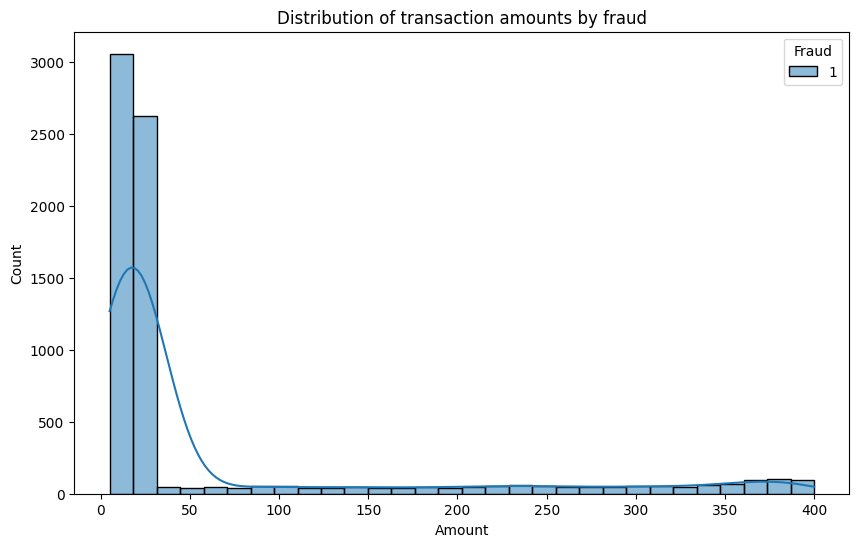

The average transaction amount for fraudulent transactions is 63.89,with a median amount of 21.00.


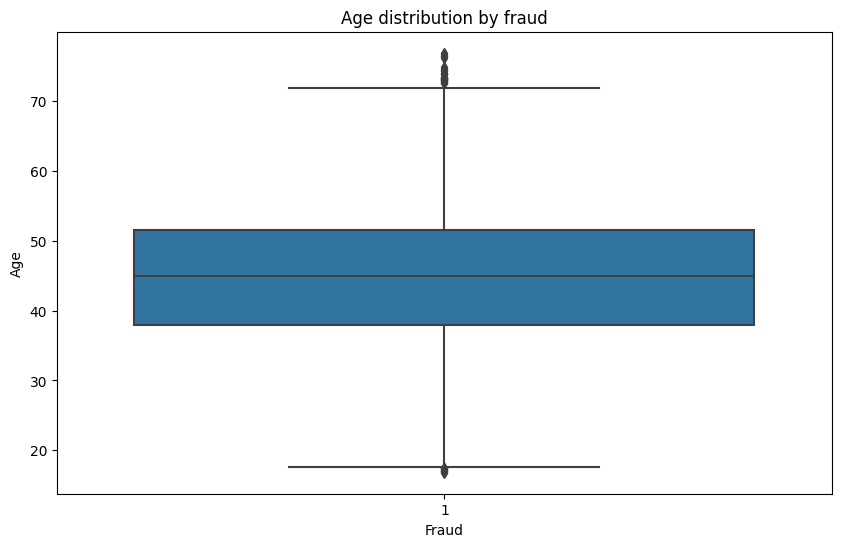

The median age for fraudulent transactions is 44.9.


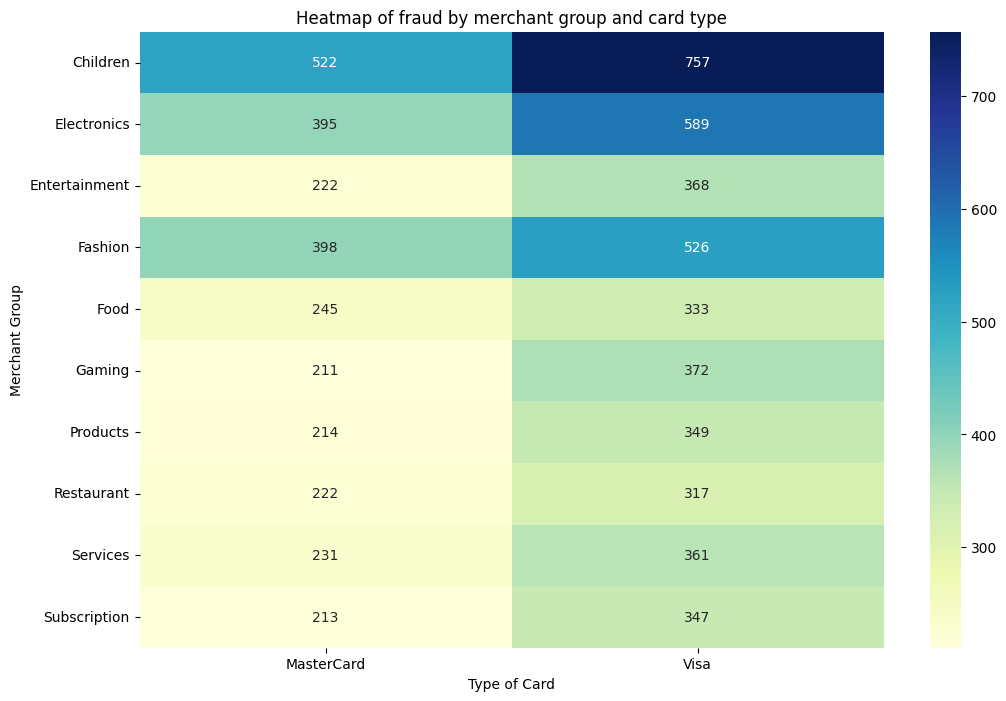

The merchant group with the highest number of fraudulent transactions is 'Children'.
The card type most frequently used in fraudulent transactions is 'Visa'.


In [17]:
# Amount distribution by fraud
plt.figure(figsize=(10, 6))
sns.histplot(data=data_fraud, x='Amount', hue='Fraud', kde=True, bins=30)
plt.title('Distribution of transaction amounts by fraud')
plt.show()

# Generate interpretative sentence for amount
fraud_amount_mean = data_fraud[data_fraud['Fraud'] == 1]['Amount'].mean()
fraud_amount_median = data_fraud[data_fraud['Fraud'] == 1]['Amount'].median()

print(f"The average transaction amount for fraudulent transactions is {fraud_amount_mean:.2f},with a median amount of {fraud_amount_median:.2f}.")


# Boxplot of Age by fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud', y='Age', data=data_fraud)
plt.title('Age distribution by fraud')
plt.show()

# Generate interpretative sentence for age
fraud_age_median = data_fraud[data_fraud['Fraud'] == 1]['Age'].median()

print(f"The median age for fraudulent transactions is {fraud_age_median:.1f}.")

# Heatmap of fraud by merchant group and card type
pivot_table = pd.pivot_table(data_fraud, values='Transaction ID', index='Merchant Group', columns='Type of Card', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of fraud by merchant group and card type')
plt.show()

# Generate interpretative sentence for heatmap
max_fraud_merchant_group = pivot_table.sum(axis=1).idxmax()
max_fraud_card_type = pivot_table.sum(axis=0).idxmax()

print(f"The merchant group with the highest number of fraudulent transactions is '{max_fraud_merchant_group}'.")
print(f"The card type most frequently used in fraudulent transactions is '{max_fraud_card_type}'.")


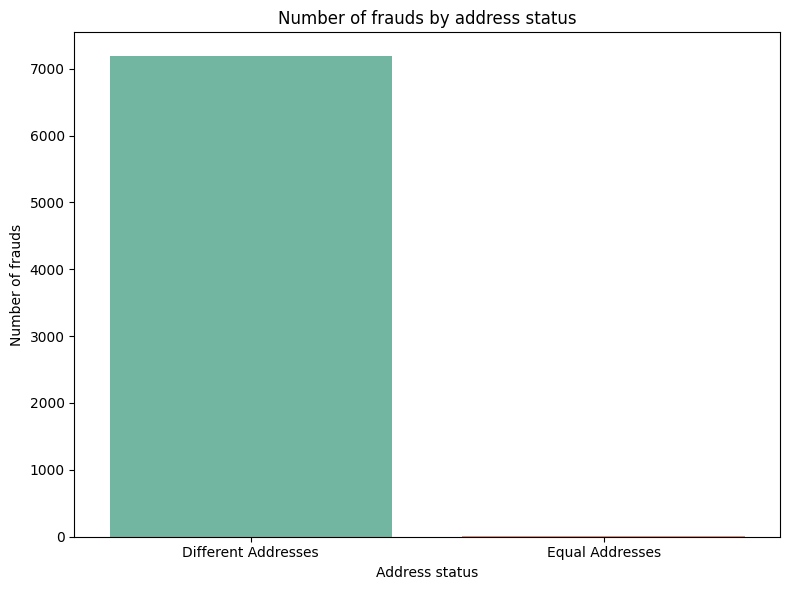

The bar graph shows that transactions with 'Different Addresses' have 7184 fraudulent cases, which is significantly higher compared to transactions with 'Equal Addresses', which have 8 fraudulent cases. This suggests that discrepancies in addresses are strong indicators of fraud.


In [18]:
# Creation of a temporary series to indicate whether addresses are equal
addresses_equal = (data_fraud['Country of Transaction'] == data_fraud['Shipping Address']) & (data_fraud['Shipping Address'] == data_fraud['Country of Residence'])

# Convert 'addresses_equal' series to object type with 'Equal Addresses' and 'Different Addresses' labels
addresses_equal = addresses_equal.map({True: 'Equal Addresses', False: 'Different Addresses'})

# Creation of a pivot table to count frauds by case
fraud_counts = data_fraud.groupby(addresses_equal)['Fraud'].sum().reset_index()
fraud_counts.columns = ['Address status', 'Fraud']

# Bar graph plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Address status', y='Fraud', data=fraud_counts, palette='Set2')
plt.title('Number of frauds by address status')
plt.xlabel('Address status')
plt.ylabel('Number of frauds')
plt.tight_layout()
plt.show()

# Automatic interpretation
equal_frauds = fraud_counts[fraud_counts['Address status'] == 'Equal Addresses']['Fraud'].values[0]
different_frauds = fraud_counts[fraud_counts['Address status'] == 'Different Addresses']['Fraud'].values[0]

interpretation = (f"The bar graph shows that transactions with 'Different Addresses' have {different_frauds} "
                  f"fraudulent cases, which is significantly higher compared to transactions with 'Equal Addresses', "
                  f"which have {equal_frauds} fraudulent cases. This suggests that discrepancies in addresses are "
                  f"strong indicators of fraud.")

print(interpretation)


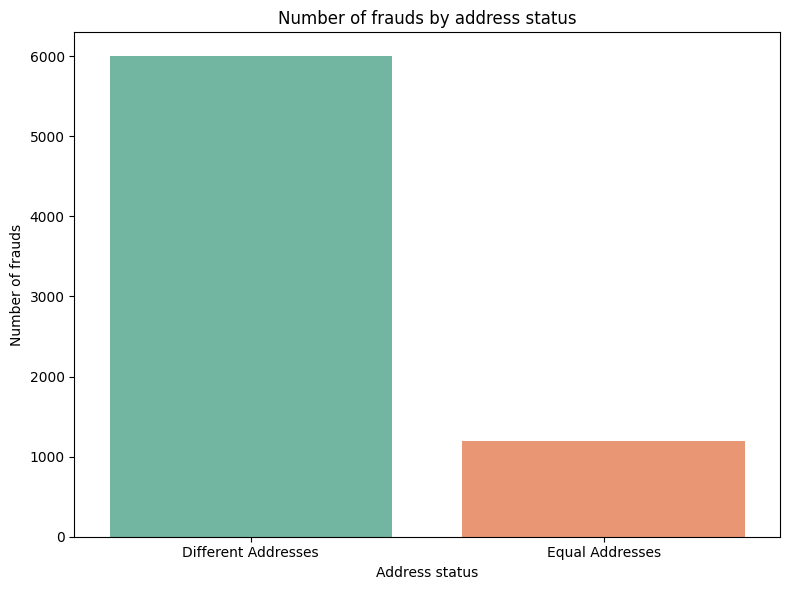

The bar graph shows that transactions with 'Different Addresses'i.e. a transaction country different from the country of residence, have 5999 fraudulent cases, which is significantly higher compared to transactions with 'Equal Addresses', which have 1193 fraudulent cases. This suggests that discrepancies in addresses are strong indicators of fraud.


In [19]:
# Calculation of equality or difference between country of transaction and shipping address
addresses_equal = (data_fraud['Country of Transaction'] == data_fraud['Country of Residence'])
addresses_equal = addresses_equal.map({True: 'Equal Addresses', False: 'Different Addresses'})

# Creation of a pivot table to count frauds by case
fraud_counts = data_fraud.groupby(addresses_equal)['Fraud'].sum().reset_index()
fraud_counts.columns = ['Address status', 'Fraud'] 

# Bar graph plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Address status', y='Fraud', data=fraud_counts, palette='Set2')
plt.title('Number of frauds by address status')
plt.xlabel('Address status')
plt.ylabel('Number of frauds')
plt.tight_layout()
plt.show()

# Automatic interpretation
equal_frauds = fraud_counts[fraud_counts['Address status'] == 'Equal Addresses']['Fraud'].values[0]
different_frauds = fraud_counts[fraud_counts['Address status'] == 'Different Addresses']['Fraud'].values[0]

interpretation = (f"The bar graph shows that transactions with 'Different Addresses'i.e. a transaction country different from the country of residence, have {different_frauds} "
                  f"fraudulent cases, which is significantly higher compared to transactions with 'Equal Addresses', "
                  f"which have {equal_frauds} fraudulent cases. This suggests that discrepancies in addresses are "
                  f"strong indicators of fraud.")

print(interpretation)


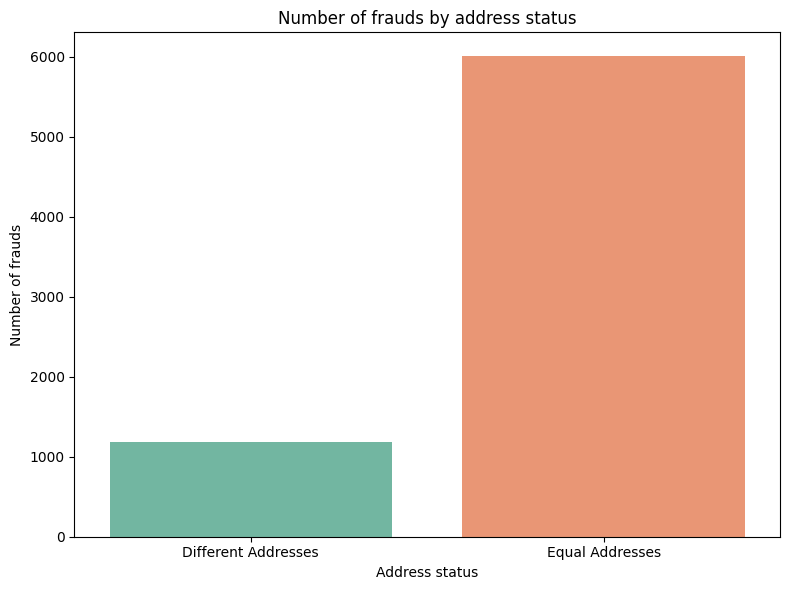

The bar graph shows that transactions with 'Different Addresses' i.e. a transaction country different fromthe Shipping Address, have 1185 fraudulent cases, while transactions with 'Equal Addresses' have 6007 fraudulent cases. This indicates that discrepancies in addresses may be a significant indicator of fraud.


In [20]:
# Calculation of equality or difference between country of transaction and shipping address
addresses_equal = (data_fraud['Country of Transaction'] == data_fraud['Shipping Address'])
addresses_equal = addresses_equal.map({True: 'Equal Addresses', False: 'Different Addresses'})

# Creation of a pivot table to count frauds by case
fraud_counts = data_fraud.groupby(addresses_equal)['Fraud'].sum().reset_index()
fraud_counts.columns = ['Address status', 'Fraud'] 

# Bar graph plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Address status', y='Fraud', data=fraud_counts, palette='Set2')
plt.title('Number of frauds by address status')
plt.xlabel('Address status')
plt.ylabel('Number of frauds')
plt.tight_layout()
plt.show()

# Automatic interpretation
equal_frauds = fraud_counts[fraud_counts['Address status'] == 'Equal Addresses']['Fraud'].values[0]
different_frauds = fraud_counts[fraud_counts['Address status'] == 'Different Addresses']['Fraud'].values[0]

interpretation = (f"The bar graph shows that transactions with 'Different Addresses' i.e. a transaction country different fromthe Shipping Address, have {different_frauds} "
                  f"fraudulent cases, while transactions with 'Equal Addresses' have {equal_frauds} fraudulent cases. "
                  f"This indicates that discrepancies in addresses may be a significant indicator of fraud.")

print(interpretation)


In [21]:
data['Gender'] = data['Gender'].replace({'M': 0, 'F': 1}).astype('int64')

/tmp/ipykernel_33/2210213801.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'M': 0, 'F': 1}).astype('int64')
/tmp/ipykernel_33/2210213801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].replace({'M': 0, 'F': 1}).astype('int64')


In [22]:
df_encoded = data.copy()
categorical_columns = ['Country of Residence','Country of Transaction', 'Shipping Address',
                       'Type of Card', 'Entry Mode', 'Type of Transaction', 'Day of Week']

for column in categorical_columns:
    categories = df_encoded[column].unique()
    for category in categories:
        df_encoded[f'{column}_{category}'] = (df_encoded[column] == category).astype(int)
    df_encoded.drop(columns=[column], inplace=True)

df_encoded.drop(columns=['Merchant Group'], inplace=True)
df_encoded.drop(columns=['Bank'], inplace=True)
print(df_encoded.head())


  Transaction ID       Date  Time  Amount  Gender   Age  Fraud  \
0      #3577 209 2020-10-14    19     5.0       0  25.2      0   
1      #3039 221 2020-10-14    17   288.0       1  49.6      0   
2      #2694 780 2020-10-14    14     5.0       1  42.2      0   
3      #2640 960 2020-10-13    14    28.0       1  51.0      0   
4      #2771 031 2020-10-13    23    91.0       0  38.0      1   

   Country of Residence_United Kingdom  Country of Residence_USA  \
0                                    1                         0   
1                                    0                         1   
2                                    0                         0   
3                                    1                         0   
4                                    1                         0   

   Country of Residence_India  ...  Entry Mode_Tap  Entry Mode_PIN  \
0                           0  ...               1               0   
1                           0  ...               0    

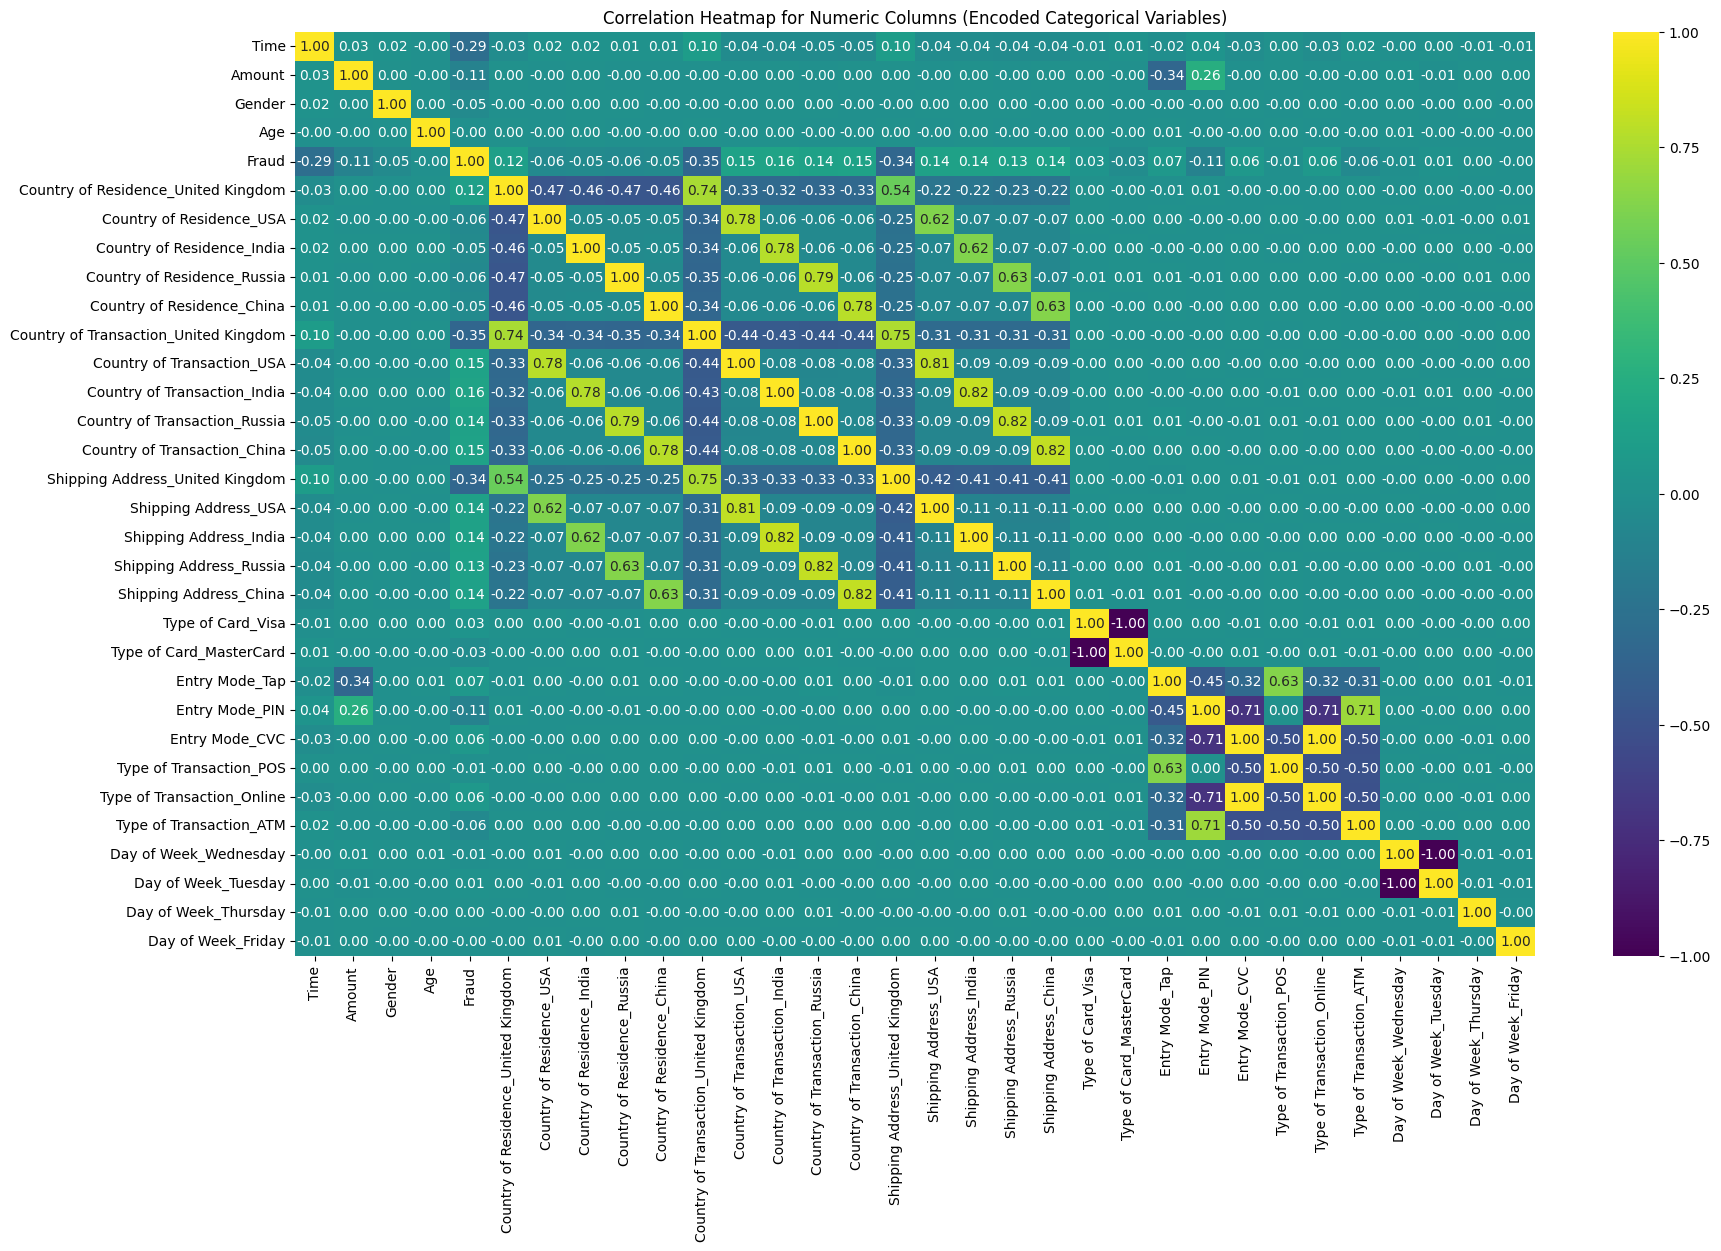

In [23]:
# Select numeric columns only
df_encoded_num= df_encoded.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
correlation_matrix_encoded = df_encoded_num.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='viridis', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns (Encoded Categorical Variables)')

plt.show()

Based on the analysis focused on "fraud" cases:

* The total percentage of fraud cases is 7.194%, totaling 7192 instances.
* The overwhelming majority (98.2%) of fraud cases originate from residents of the United Kingdom.
* The most common card type is "Visa," accounting for 60.1% of all transactions.
* The group "Children" stands out as the most fraudulent among merchant groups, comprising 17.8% of transactions.
* The most prevalent entry mode is "CVC," accounting for 44.5% of transactions.
* Fraudulent card usage is predominantly associated with the "CVC" entry mode and "Online" transactions, showing a perfect correlation of +1.00.
* "Online" transactions dominate with 44.5% of total transactions.
* The most frequent days for transactions are Tuesday (51.9%) and Wednesday (48.1%).
* Transactions primarily occur in the morning, peaking between 12 AM and 5 AM.
* "M" (Male) is the most common gender, representing 59.4% of transactions.
* This analysis provides a comprehensive overview of fraud-related insights, highlighting key trends and patterns within the dataset.
* Most fraudulent transaction amounts are relatively small, with an average amount of 63.89 and a median of 21.00. What's more, the country of transaction or delivery address frequently differs from the country of residence, suggesting that the majority of frauds originate abroad, probably to avoid detection.


# IV-PREDICTIVE MODELS

In [24]:
# Separation of features and target
X = df_encoded.drop(columns=['Transaction ID', 'Date','Fraud'])
y = df_encoded['Fraud']

# Separation of data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Creation of a pipeline with SMOTE oversampling and a RandomForest model
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=2, min_samples_split=10, random_state=42))
])

# Stratified cross-validation with ROC-AUC metric
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc')

print(f'Average ROC-AUC score: {scores.mean():.4f}')

# Entraînement du pipeline sur l'ensemble d'entraînement complet
pipeline.fit(X_train, y_train)

# Prédiction et évaluation sur l'ensemble de test
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC score on test set: {roc_auc:.4f}')


Average ROC-AUC score: 0.9911
ROC-AUC score on test set: 0.9921


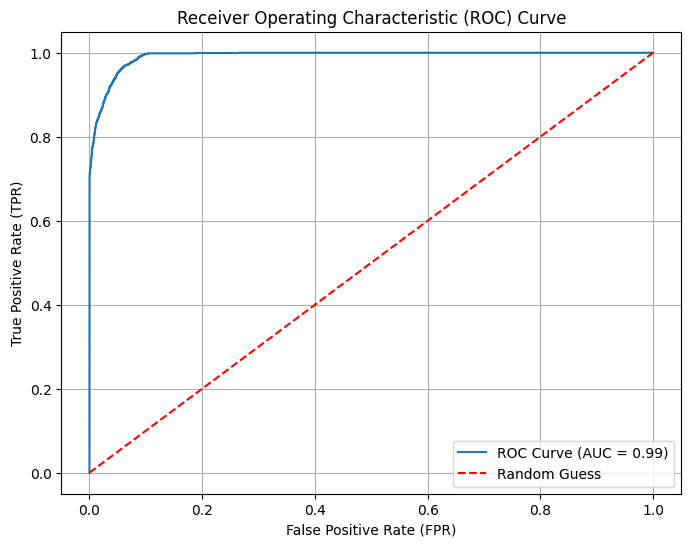

<Figure size 800x600 with 0 Axes>

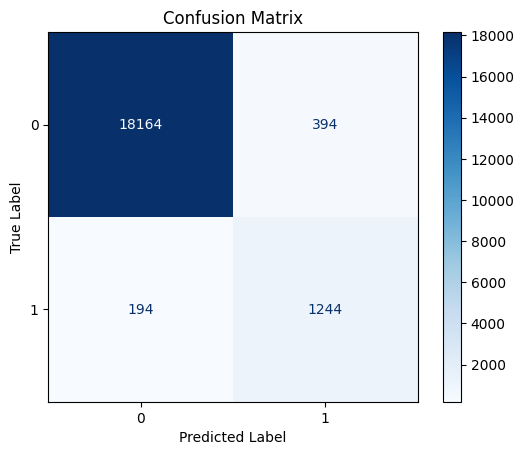

ROC Curve Analysis:
- The ROC curve illustrates the model's ability to discriminate between classes.
- AUC (Area Under Curve) score: 0.9921. A score closer to 1 indicates a better model.

Confusion Matrix Analysis:
- True Positives (TP): 1244
- True Negatives (TN): 18164
- False Positives (FP): 394
- False Negatives (FN): 194
- Precision: 0.7595
- Recall (True Positive Rate): 0.8651


In [25]:
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()

# Automatic interpretation
print(f"ROC Curve Analysis:")
print(f"- The ROC curve illustrates the model's ability to discriminate between classes.")
print(f"- AUC (Area Under Curve) score: {roc_auc:.4f}. A score closer to 1 indicates a better model.")
print()
print(f"Confusion Matrix Analysis:")
print(f"- True Positives (TP): {cm[1, 1]}")
print(f"- True Negatives (TN): {cm[0, 0]}")
print(f"- False Positives (FP): {cm[0, 1]}")
print(f"- False Negatives (FN): {cm[1, 0]}")
print(f"- Precision: {cm[1, 1] / (cm[1, 1] + cm[0, 1]):.4f}")
print(f"- Recall (True Positive Rate): {cm[1, 1] / (cm[1, 1] + cm[1, 0]):.4f}")


Analysis of the ROC curve shows that the model has a high ability to discriminate between positive and negative classes, illustrated by an AUC (Area Under Curve) score of 0.9921. This high score indicates that the model is highly effective in distinguishing fraudulent from legitimate transactions.

Looking at the confusion matrix, we see that the model correctly predicted 1244 fraudulent transactions (true positives) and 18164 legitimate transactions (true negatives). However, it also misclassified 394 legitimate transactions as fraudulent (false positives) and missed 194 fraudulent transactions (false negatives). The precision of the model is estimated at 0.7595, indicating the proportion of correct positive predictions among all positive predictions. Recall, or true positive rate, is 0.8651, which represents the proportion of true positives identified among all truly fraudulent transactions.

In summary, although the model shows excellent discriminative ability with a high AUC score, there are still opportunities for improvement, particularly in reducing the number of false positives and false negatives to optimize both precision and recall.

Training Logistic Regression...
Evaluation of Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27836
           1       0.77      0.75      0.76      2158

    accuracy                           0.97     29994
   macro avg       0.88      0.87      0.87     29994
weighted avg       0.97      0.97      0.97     29994

AUC-ROC: 0.9755163002258296


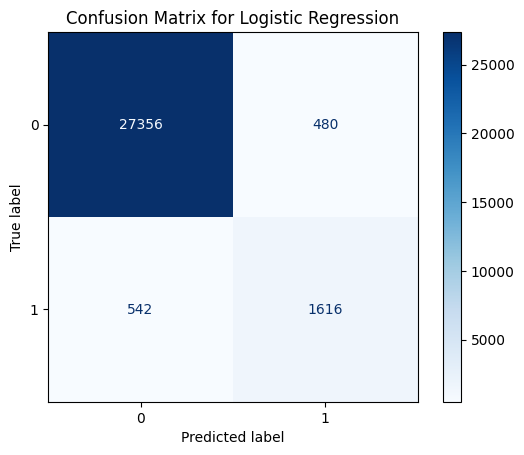

Training Decision Tree...
Evaluation of Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27836
           1       0.78      0.79      0.78      2158

    accuracy                           0.97     29994
   macro avg       0.88      0.89      0.88     29994
weighted avg       0.97      0.97      0.97     29994

AUC-ROC: 0.8863838521428502


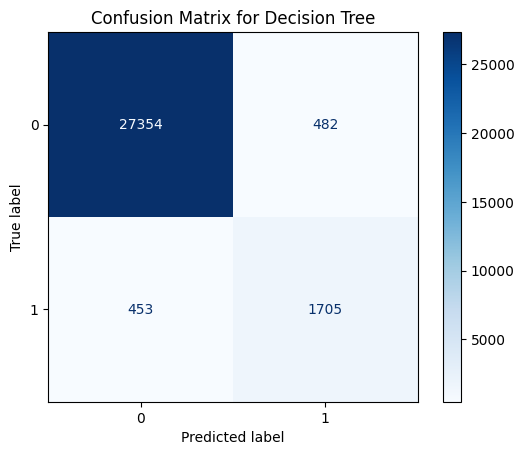

Training Random Forest...
Evaluation of Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     27836
           1       0.91      0.77      0.84      2158

    accuracy                           0.98     29994
   macro avg       0.95      0.88      0.91     29994
weighted avg       0.98      0.98      0.98     29994

AUC-ROC: 0.9879184295518261


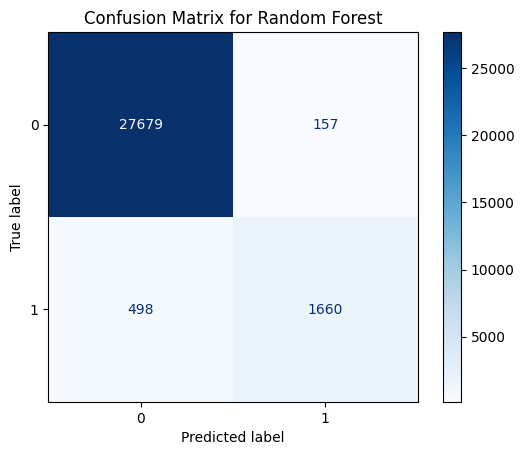

Training Gradient Boosting...
Evaluation of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27836
           1       0.82      0.84      0.83      2158

    accuracy                           0.97     29994
   macro avg       0.90      0.91      0.91     29994
weighted avg       0.98      0.97      0.98     29994

AUC-ROC: 0.9907057485915451


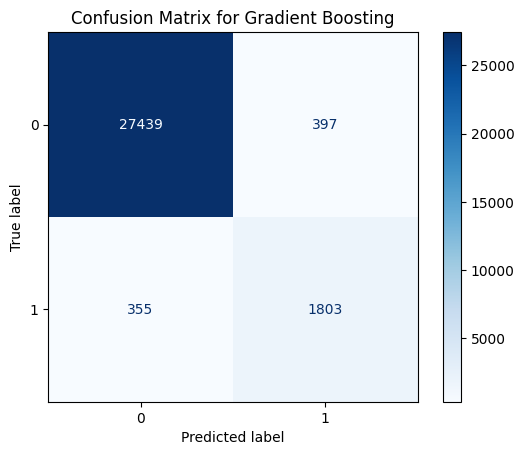

Training XGBoost...
Evaluation of XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     27836
           1       0.91      0.78      0.84      2158

    accuracy                           0.98     29994
   macro avg       0.94      0.89      0.91     29994
weighted avg       0.98      0.98      0.98     29994

AUC-ROC: 0.9913479400929128


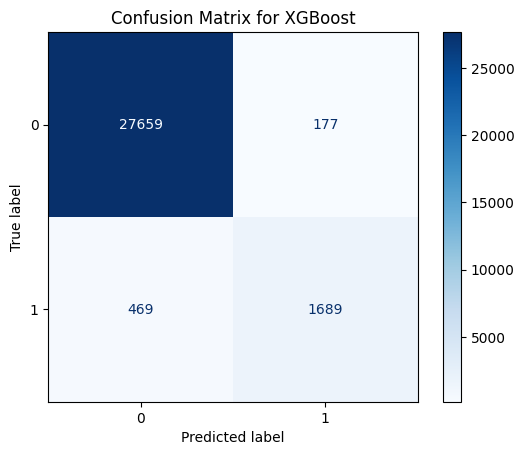

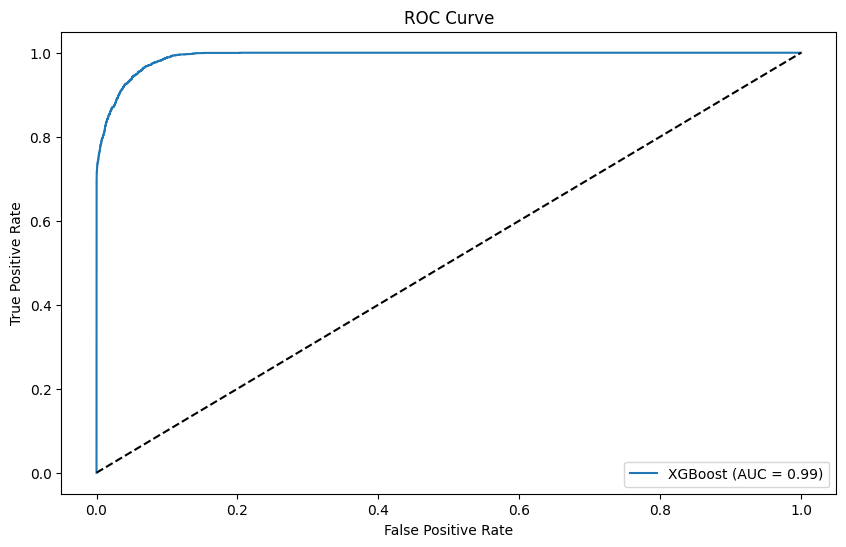

In [26]:
df = df_encoded.drop(columns=['Date', 'Transaction ID'])
X = df.drop('Fraud', axis=1)
y = df['Fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Data balancing with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Characteristic standardization
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Test models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Model training and evaluation
results = {}
for model_name, model in models.items():
    print(f'Training {model_name}...')
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f'Evaluation of {model_name}:')
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_proba)
    print(f'AUC-ROC: {auc}')
    
    # Calculation of the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    results[model_name] = {
        'model': model,
        'auc': auc,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

# ROC curve for the best model
best_model_name = max(results, key=lambda x: results[x]['auc'])
best_model = results[best_model_name]['model']
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {results[best_model_name]["auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


* Random Forest, Gradient Boosting and XGBoost models show high performance with AUC-ROC above 0.98, indicating a good ability to discriminate between classes.
* Logistic Regression and Decision Tree show slightly lower performance in terms of AUC-ROC, though still effective with scores around 0.88.
* All models show high precision (Precision) for fraud detection (class 1), with values ranging from 0.77 to 0.91, indicating a low number of false positives.
* Recall values for class 1 range from 0.75 to 0.84, meaning that the models effectively capture the majority of fraud cases.



# V-CONCLUSION

In summary, analysis of our fraud data reveals several key points. Firstly, we note that fraudulent transactions account for 7.194% of all cases, with a significant concentration (98.2%) coming from the UK in terms of country of residence. The majority of frauds are associated with the use of Visa cards (60.1%) and the CVC entry mode (44.5%) for online transactions. What's more, fraudulent transactions are often for small amounts, with an average of 63.89 and a median of 21.00, which could indicate an attempt to minimize the risk of detection.

Furthermore, it is notable that frauds are often carried out with delivery addresses or transaction countries different from the cardholder's country of residence, suggesting an international origin of fraudulent activities to avoid local controls. This analysis highlights the importance of monitoring international transactions and improving early detection methods to reduce the risk of fraud in our system.
As a conclusion to our model evaluation, we observe that each machine learning algorithm shows distinct performance in fraud detection. The Logistic Regression model achieves an overall accuracy of 97% with an AUC-ROC of 0.976, showing a solid ability to predict fraud while maintaining a good balance between precision and recall. In comparison, the Decision Tree performs slightly worse, with an overall accuracy of 97% and an AUC-ROC of 0.886, suggesting a tendency to overestimate fraud compared to other models.

The Random Forest model, despite a high precision of 98%, has a lower recall for fraud cases, indicating a lower ability to detect all potential frauds. In contrast, Boosting models such as Gradient Boosting and XGBoost show high performance with AUC-ROC of 0.991 and 0.991 respectively, demonstrating a better ability to detect fraud while maintaining high precision.

In conclusion, to optimize fraud detection, it would be advisable to use Boosting models such as Gradient Boosting or XGBoost, which offer both high precision and good recall to effectively identify fraudulent transactions. These results underline the importance of choosing the right model for the specific fraud detection needs of our system.